In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

op = webdriver.ChromeOptions()
op.add_argument('--headless')
op.add_argument('--no-sandbox')
op.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=op)

url = "https://finance.yahoo.com/quote/%5EIXIC/history/"
driver.get(url)
wait = WebDriverWait(driver, 15)
rows = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "tr")))

finance_data={}
my_data=[]

for row in rows[1:]:
    cells = row.find_elements(By.TAG_NAME, "td")
    date = cells[0].text           # 날짜 (Date)
    open = float(cells[1].text.replace(',', ''))      # 시가 (Open)
    close = float(cells[4].text.replace(',', ''))     # 종가 (Close)
    ratio = ((close - open) / open) * 100             # 등락률 (in_de)
    finance_data={"Date": date, "Open": open, "Close": close, "in_de": round(ratio, 2)}
    my_data.append(finance_data)


driver.quit()
print(my_data)


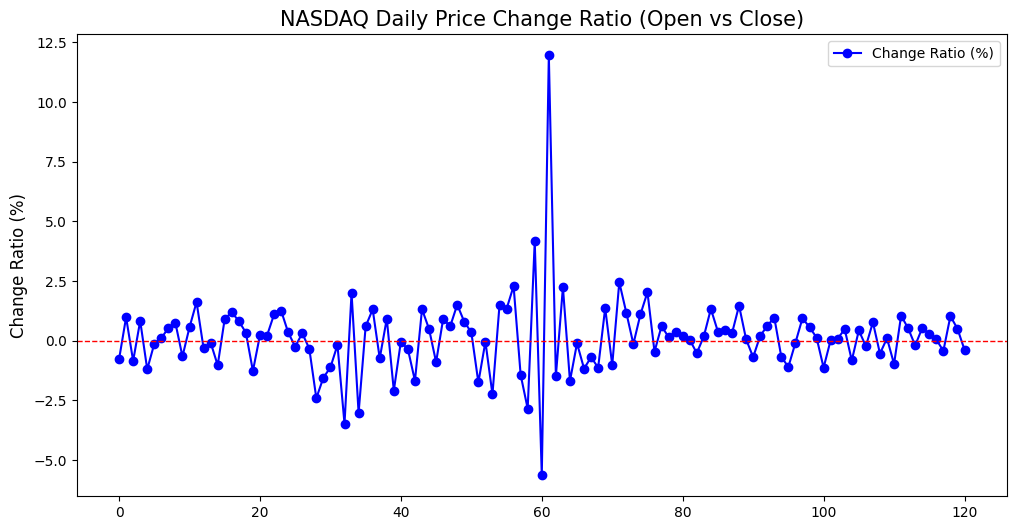

In [ ]:
import matplotlib.pyplot as plt

my_data1 = my_data[130:]
dates = [d['Date'] for d in my_data1]
ratios = [d['in_de'] for d in my_data1]

# 2. 데이터 정렬 (웹에서 가져온 데이터는 최신순이므로 과거순으로 뒤집기)
dates.reverse()
ratios.reverse()

plt.figure(figsize=(12, 6))
plt.plot(ratios, marker='o', linestyle='-', color='b', label='Change Ratio (%)')

plt.title('NASDAQ Daily Price Change Ratio (Open vs Close)', fontsize=15)
plt.ylabel('Change Ratio (%)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()

plt.show()
del my_data1
